In [6]:
import BioSimSpace as BSS

In [7]:
node = BSS.Gateway.Node("A node to parameterise a small molecule, run MD and do a conformational analysis.")
node.addAuthor(name="Antonia Mey", email="antonia.mey@ed.ac.uk", affiliation="University of Edinburgh")
node.setLicense("GPLv3")

In [8]:
node.addInput("system", BSS.Gateway.FileSet(help="Coordinate and topology file for simulation"))
node.addInput("simulation_temp", BSS.Gateway.Temperature(help="Temperature for the production run", default=300, unit="kelvin"))
node.addInput("simulation_length", BSS.Gateway.Time(help="Simulation time for production runs in nanoseconds", default=100, unit="nanosecond"))
node.addOutput("system", BSS.Gateway.FileSet(help="Outputfiles to be used with a NPT equilibration and production simulation"))

In [9]:
node.showControls()

Box(children=(Box(children=(Box(children=(Label(value='system: Coordinate and topology file for simulation'), …

Uploaded 'nvt.gro87' (342.53 kB)
Uploaded 'nvt.grotop' (14.15 kB)


## Equilibration NPT

In [11]:
system = BSS.IO.readMolecules(node.getInput("system"))

In [12]:
protocol = BSS.Protocol.Equilibration(temperature=node.getInput("simulation_temp"), ensemble='NPT',runtime=0.5*BSS.Units.Time.nanosecond)
process = BSS.MD.run(system, protocol, name="npt_equilibrate")

In [18]:
process.isRunning()

False

/home/ppxasjsm/Projects/git/BioSimSpace/python/BioSimSpace/Notebook/_plot.py:213: UserWarning: Mismatch in list sizes: len(x) = 2050, len(y) = 2051
  % (len(x), len(y)))


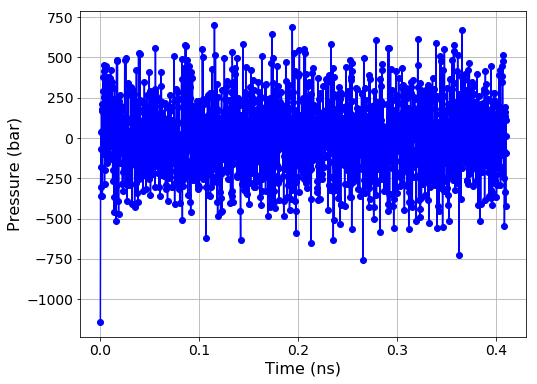

In [17]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(process.getTime(time_series=True),
    process.getPressure(time_series=True))

## Production Run

In [19]:
npt_syst = process.getSystem()

In [21]:
protocol = BSS.Protocol.Production(temperature=node.getInput("simulation_temp"), ensemble='NPT',runtime=node.getInput("simulation_length"), restart=True)
process = BSS.MD.run(npt_syst, protocol, name="production")

ValueError: Cannot find an MD package that supports format: GroTop,RST